In [82]:
import pandas as pd 

In [83]:
data = pd.read_excel(r"C:\Users\Lenovo\Documents\Tasnim\keto\keto.xlsx")
# CHANGE THE PFAD THAT IS IT. I WILL SOLVE THE PROBLEM TODAY 

In [84]:
df = pd.DataFrame(data)

In [85]:
# berechnet für mehrere Lebensmittel deren inhatl und gibt sie zurück (name, fat, carbs, protei)
def anteil(input):
    
    anteil = []
    for lebensmittel in input: 

        result =  df[df["name"] == lebensmittel[0]]
    
    # wenn lebensmittel nicht im Dataframe vorhanden ist:
        if result.values.shape[0] == 0:
            print(f'Es gibt kein Nahrungsmittels mit diesen Name {lebensmittel[0]}' )

    # wennn die Menge nummber ist also 100g  und nicht medium ist.
        elif isinstance(result["menge"].values[0], int):
            fatanteil = lebensmittel[1] * result["fat"].values[0] / result["menge"].values[0]
            carbsanteil = lebensmittel[1] * result["carbs"].values[0] / result["menge"].values[0]
            proteinanteil = lebensmittel[1] * result["protein"].values[0] / result["menge"].values[0]
            anteil.append([lebensmittel[0], fatanteil, carbsanteil, proteinanteil])
        else: 
            fatanteil = lebensmittel[1] * result["fat"].values[0] 
            carbsanteil = lebensmittel[1] * result["carbs"].values[0] 
            proteinanteil = lebensmittel[1] * result["protein"].values[0]
            anteil.append([lebensmittel[0], fatanteil, carbsanteil, proteinanteil])
    return anteil
    


In [86]:
# summiert die inhalte zusammen und gibt sie einzeln und als summe zusammen 
def summ(input:list):
    fatssume = 0
    carbssumme= 0
    proteinsumme = 0
    for lebensmittel in input:
        fatssume += lebensmittel[1]
        carbssumme += lebensmittel[2]
        proteinsumme += lebensmittel[3]

    print(f'fats: {fatssume}, carbs: {carbssumme}, protein: {proteinsumme}')
    return[fatssume, carbssumme, proteinsumme]

In [87]:
df

,name,menge,fat,carbs,protein,kcal
0,broccoli,100,0.2,2.7,3.8,26.0
1,egg,Medium,4.2,0.3,5.5,63.0
2,zucchini,100,0.4,2.7,1.2,15.0
3,butter,100,82.0,0.7,0.6,743.0
4,sardine,100,27.0,0.5,20.0,326.0
...,...,...,...,...,...,...
56,schwarze_oliven,100,37.0,5.7,1.8,364.0
57,exquisa_frishkaese,100,22.5,3.0,5.5,238.0
58,huettenkaese,100,3.2,1.5,12.3,87.0
59,erbsen_moehrchen,100,0.5,6.3,2.8,47.0


## HIER SOLLTE MAN DIE INFO ANGEBEN

In [99]:
tasnimsFat = 108
tasnimsCarbs = 16 
tasnimsProtein = 65

tasnimsfood = anteil([("ghee", 15), ("egg", 3), ("haselnuss_mus", 50), ("coconut_raspel", 15), ("heidelbeeren", 20)])
print("TASNIM")
summ(tasnimsfood)
print("-----------------------------------------------------------------------------")
#################################################################################

joumansFat = 200
joumansCarbs = 30
joumansProtein = 120 

joumansfood = anteil([("egg", 3),("ghee", 20), ("egg", 1),  ("meat", 250),
                      ("gratinkaese", 75), ("schwarze_oliven", 30), ("exquisa_frishkaese", 50),("black_watermelon_seed", 50)
                      ,("chiaseed", 7), ("flaxseed",13), ("pfannekaese", 100)])
print("JOUMAN")
summ(joumansfood)
print("-------------------------------------------------------------------------------")

TASNIM
fats: 76.44999999999999, carbs: 6.039999999999999, protein: 25.125
-----------------------------------------------------------------------------
JOUMAN
fats: 182.71, carbs: 14.055000000000001, protein: 129.865
-------------------------------------------------------------------------------


fats: 113.37, carbs: 7.220000000000001, protein: 62.555000000000014
fats: 182.71, carbs: 14.055000000000001, protein: 129.865


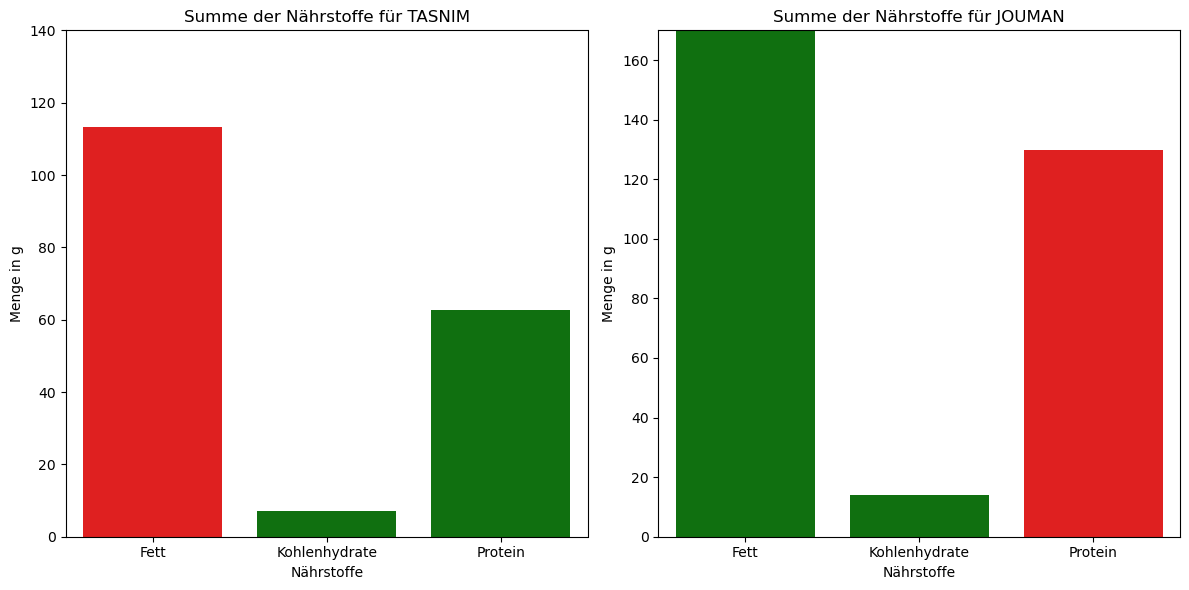

In [89]:
    
import matplotlib.pyplot as plt
import seaborn as sns                            

fat_sum, carbs_sum, protein_sum = summ(tasnimsfood)
color_fat = 'red' if fat_sum > tasnimsFat else 'green'
color_carbs = 'red' if carbs_sum > tasnimsCarbs else 'green'
color_protein = 'red' if protein_sum > tasnimsProtein else 'green'

# Erstellen von zwei Plots nebeneinander
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Erster Plot
sns.barplot(x=["Fett", "Kohlenhydrate", "Protein"], y=[fat_sum, carbs_sum, protein_sum],hue=["Fett", "Kohlenhydrate", "Protein"], palette=[color_fat, color_carbs, color_protein], ax=axs[0])
axs[0].set_ylim(0, 140)
axs[0].set_xlabel("Nährstoffe")
axs[0].set_ylabel("Menge in g")
axs[0].set_title("Summe der Nährstoffe für TASNIM")

#################################################################################################################################################################


fat_sum, carbs_sum, protein_sum = summ(joumansfood)
color_fat = 'red' if fat_sum > joumansFat else 'Green'
color_carbs = 'red' if carbs_sum > joumansCarbs else 'green'
color_protein = 'red' if protein_sum > joumansProtein else 'green'

# Zweiter Plot (optional, ein Beispielplot)
sns.barplot(x=["Fett", "Kohlenhydrate", "Protein"], y=[fat_sum, carbs_sum, protein_sum],hue=["Fett", "Kohlenhydrate", "Protein"], palette=[color_fat, color_carbs, color_protein], ax=axs[1])
axs[1].set_ylim(0, 170)
axs[1].set_xlabel("Nährstoffe")
axs[1].set_ylabel("Menge in g")
axs[1].set_title("Summe der Nährstoffe für JOUMAN")

# Layout anpassen
plt.tight_layout()

# Plots anzeigen
plt.show()